# 3D Wannier test

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

### Lattice order test

In [1]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(
    N,
    R0,
    lattice=np.array([3], dtype=int),
    band=2,
    dim=3,
    avg=1 / 2,
    homogenize=True,
    sparse=True,
    symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
V = interaction(dvr, U, W, parity)
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000m
lattice: Full lattice sizes: [3 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[30 20 20] is set.
DVR: R0=[4.52 3.   7.2 ]w is set.
Trap homogenized.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 6 states are to be calculated.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.61s.
H_solver: eigenstates memory usage: 0.63 MiB.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian sparse diagonalization is enabled. Lowest 6 states are to be calculated.
H_op: n=[30 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian ma

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


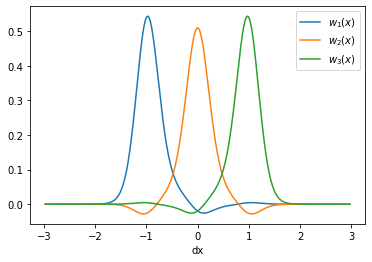

In [4]:
import matplotlib.pyplot as plt

mu = 1
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0.25])
# c = int(x[0] / dvr.dx[0])
# plt.xticks(np.arange(c, -c + 1, 1.0))
plt.plot(x / dvr.lc[0],
         positify(
             wannier_func(dvr, W[mu], U[mu], parity[mu],
                          [x, y, z]).reshape(-1, dvr.Nsite)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
# plt.plot(x / dvr.dx[0],
#          positify(
#              wannier_func(dvr, W[0], U[0], parity[0],
#                           [x, y, z]).reshape(-1, dvr.Nsite))**4,
#          label=tuple('$|w_{}(x)|^4$'.format(i + 1) for i in range(dvr.Nsite)))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

In [7]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 7.2])
dvr = Wannier(
    N,
    R0,
    lattice=np.array([8], dtype=int),
    band=1,
    dim=3,
    avg=1 / 2,
    sparse=True,
    # homogenize=True,
    symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
V = interaction(dvr, U, W, parity)
for i in range(dvr.bands):
    mu = np.diag(A[i])  # Diagonals are mu_i
    t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
    print(f'mu_i,{i+1} = ', np.real(mu))
    print(f't_ij,{i+1} =', abs(t))
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000m
lattice: Full lattice sizes: [8 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[55 20 20] is set.
DVR: R0=[8.32 3.   7.2 ]w is set.
H_op: n=[55 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[55 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 1.10s.
H_solver: eigenstates memory usage: 1.51 MiB.
H_op: n=[55 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 8 states are to be calculated.
H_op: n=[55 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Ga

4 site before and after homogenization
```python
# Original
mu_i,1 =  [-35.16516387 -36.16555435 -36.16555436 -35.16516386]
t_ij,1 = [[0.         0.29064946 0.01606727 0.00172507]
 [0.29064946 0.         0.24734239 0.01606729]
 [0.01606727 0.24734239 0.         0.29064945]
 [0.00172507 0.01606729 0.29064945 0.        ]]
mu_i,2 =  [-32.79251618 -33.89585086 -33.89585085 -32.79251618]
t_ij,2 = [[0.         0.34682663 0.02305806 0.0030429 ]
 [0.34682663 0.         0.28845945 0.02305805]
 [0.02305806 0.28845945 0.         0.34682663]
 [0.0030429  0.02305805 0.34682663 0.        ]]
U_i = [[[0.40639601 0.37965371 0.37965371 0.40639601]
  [0.18978666 0.17633672 0.17633672 0.18978666]]

 [[0.18978666 0.17633672 0.17633672 0.18978666]
  [0.27644801 0.25617171 0.25617171 0.27644801]]]

# Homogenized
mu_i,1 =  [-34.73650392 -35.33751295 -35.33751294 -34.73650392]
t_ij,1 = [[0.         0.2945714  0.01643902 0.00173805]
 [0.2945714  0.         0.25291109 0.01643901]
 [0.01643902 0.25291109 0.         0.29457139]
 [0.00173805 0.01643901 0.29457139 0.        ]]
mu_i,2 =  [-32.37612833 -33.10116745 -33.10116744 -32.37612835]
t_ij,2 = [[0.         0.35059046 0.02351768 0.003061  ]
 [0.35059046 0.         0.29428534 0.02351767]
 [0.02351768 0.29428534 0.         0.35059048]
 [0.003061   0.02351767 0.35059048 0.        ]]
U_i = [[[0.40359959 0.37140831 0.37140831 0.40359959]
  [0.18856887 0.17223324 0.17223324 0.18856887]]

 [[0.18856887 0.17223324 0.17223324 0.18856887]
  [0.27475255 0.25004282 0.25004282 0.27475255]]]

```

Trap homogenized.


(-0.65, -0.6)

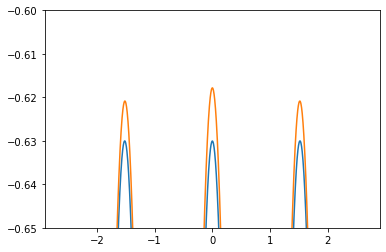

In [7]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * .5, dvr.R0[0] * .5, 1500)
dvr.Voff = np.ones(dvr.Nsite)
V0 = dvr.Vfun(x, 0, 0)

dvr.homogenize()
V1 = dvr.Vfun(x, 0, 0)

plt.plot(x, V0)
plt.plot(x, V1)
plt.ylim([-.65, -.6])
# plt.plot(x[V0 < -.9], V0[V0 < -.9])
# plt.plot(x[V1 < -.9], V1[V1 < -.9])

The trap center depth is affected mainly by two neighboring traps, but the trap barrier is only mostly affected by the its two neighboring sites. So for trap depth, the edge trap may differ much from the bulk ones, but the barrier seems more uniform.

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


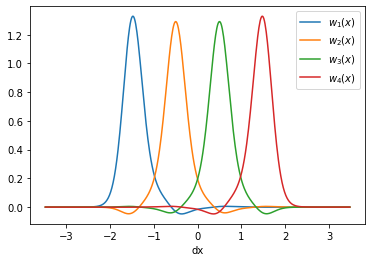

In [13]:
import matplotlib.pyplot as plt

mu = 0
x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
y = np.array([0])
z = np.array([0.25])
plt.plot(x / dvr.lc[0],
         positify(
             wannier_func(dvr, W[mu], U[mu], parity[mu],
                          [x, y, z]).reshape(-1, dvr.Nsite)),
         label=tuple(f'$w_{i + 1}(x)$' for i in range(dvr.Nsite)))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

### Reproduce PRA

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=55kHz w=707m
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.15983027 1.41442716 1.15983027]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[23 20 20] is set.
DVR: R0=[3.57991513 3.         7.2       ]w is set.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.25s.
H_solver: eigenstates memory usage: 0.32 MiB.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian operator constructed.
H_solver: diagonalize sparse

Text(0, 0.5, 'E (Hz)')

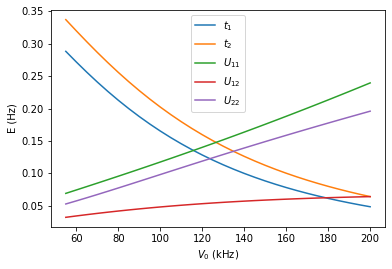

In [1]:
from wannier import *
import numpy as np
from positify import positify
import matplotlib.pyplot as plt

N = 20
ax = 820
ay = 1000
R0 = np.array([3, 3, 7.2])
V_list = np.arange(55, 205, 5)

t_list = np.array([]).reshape(0, 2)
U_list = np.array([]).reshape(0, 3)
for V0 in V_list:
    dvr = Wannier(N,
                  R0,
                  lattice=np.array([2], dtype=int),
                  lc=(ax, ay),
                  trap=(V0, 707, 2.17E3),
                  atom=86.9,
                  laser=707,
                  ascatt=95,
                  band=2,
                  avg=1,
                  dim=3,
                  sparse=True,
                  symmetry=True)

    E, W, parity = eigen_basis(dvr)

    A, U = optimization(dvr, E, W, parity)
    t_sb = np.array([])
    for i in range(dvr.bands):
        mu = np.diag(A[i])  # Diagonals are mu_i
        t = -(A[i] - np.diag(mu))  # Off-diagonals are t_ij
        print(f'mu_i,{i+1} = ', np.real(mu))
        print(f't_ij,{i+1} =', abs(t))
        t_sb = np.append(t_sb, abs(t[0, 1]))
    t_list = np.append(t_list, t_sb[None], axis=0)
    V = interaction(dvr, U, W, parity)
    print('U_i =', abs(V))
    U_list = np.append(U_list, abs(V[[0, 0, 1], [0, 1, 1], 0][None]), axis=0)

plt.plot(V_list, t_list, label=('$t_1$', '$t_2$'))
plt.plot(V_list, U_list, label=('$U_{{11}}$', '$U_{{12}}$', '$U_{{22}}$'))
plt.legend()
plt.xlabel('$V_0$ (kHz)')
plt.ylabel('E (Hz)')

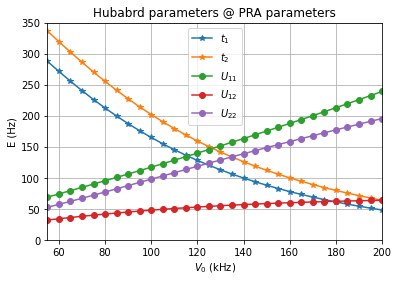

In [2]:
plt.plot(V_list, t_list * 1E3, '*-', label=('$t_1$', '$t_2$'))
plt.plot(V_list, U_list * 1E3, 'o-', label=('$U_{{11}}$', '$U_{{12}}$', '$U_{{22}}$'))
plt.legend()
plt.title('Hubabrd parameters @ PRA parameters')
plt.xlabel('$V_0$ (kHz)')
plt.ylabel('E (Hz)')
plt.ylim([0, 350])
plt.xlim([55, 200])
plt.grid()
plt.savefig('Hubbard.png')

### Trap plots

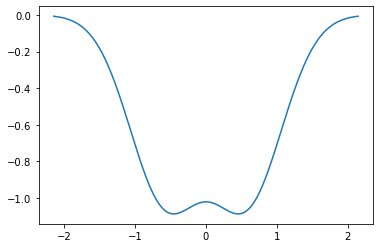

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * 0.6, dvr.R0[0] * 0.6, 500)
V = dvr.Vfun(x, 0, 0)

plt.plot(x, V)

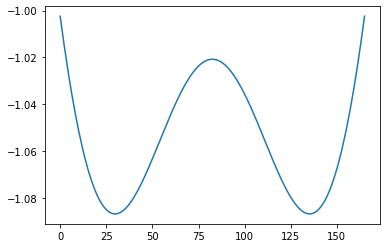

In [3]:
plt.plot(V[V < -1])

The trap depth difference between edges and bulks are $\sim 1\%$.

### Wannier function plots

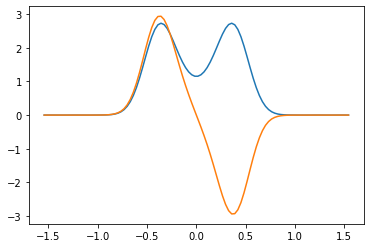

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] / 2, dvr.R0[0] / 2, 100)
y = np.array([0])
V = np.array([]).reshape(len(x), 0)
for i in range(parity.shape[0]):
    p = np.concatenate((parity[i], [1]))
    V = np.append(V,
                  psi(dvr.n, dvr.dx, W[i], x, y, y, p).reshape(-1, 1),
                  axis=1)
plt.plot(x * dvr.w * a0 * 1E9 / ax, positify(V))

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


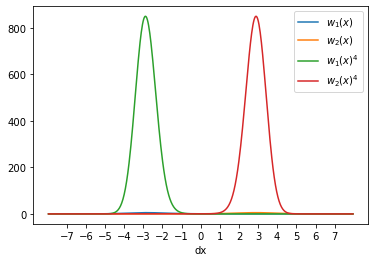

In [6]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] / 3, dvr.R0[0] / 3, 500)
y = np.array([0])
# plt.plot(x * dvr.w * a0 * 1E9 / ax,
c = int(x[0] / dvr.dx[0])
plt.xticks(np.arange(c, -c + 1, 1.0))
plt.plot(x / dvr.dx[0],
         positify(wannier_func(x, y, y, dvr, W, U, parity).reshape(-1, 2)),
         label=('$w_1(x)$', '$w_2(x)$'))
plt.plot(x / dvr.dx[0],
         positify(wannier_func(x, y, y, dvr, W, U, parity).reshape(-1, 2))**4,
         label=('$w_1(x)^4$', '$w_2(x)^4$'))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

In [8]:
a = np.random.rand(3, 5, 7)
from scipy.integrate import romb

romb(romb(a, axis=0), axis=0)


array([3.35852923, 2.84091   , 4.9672896 , 3.72873132, 3.95832271,
       3.32561347, 4.24142046])

In [1]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([4, 4, 4])
dvr = Wannier(N,
              R0,
              lattice=np.array([2], dtype=int),
              lc=(10, 1),
              model='sho',
              dim=3,
              avg=1,
              sparse=True,
              symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.2 0.2 0.2]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[4 4 4]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=1.0 w=1.0
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [10  1 10]w
DVR: dx=[0.2 0.2 0.2]w is set.
DVR: n=[45 20 20] is set.
DVR: R0=[9. 4. 4.]w is set.
H_op: n=[45 20 20] dx=[0.2 0.2 0.2]w p=[1 1 1] sho sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[45 20 20] dx=[0.2 0.2 0.2]w p=[1 1 1] sho operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: sho Hamiltonian solved. Time spent: 0.68s.
H_solver: eigenstates memory usage: 0.31 MiB.
H_op: n=[45 20 20] dx=[0.2 0.2 0.2]w p=[-1  1  1] sho sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[45 20 20] dx=[0.2 0.2 0.2]w p=[-1  1  1] sho operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: sho Hamiltonian solved. Time spent: 0.63s.
H_solver: eigenstates memory

## Spectrum of higher levels

In [10]:
from wannier import *
import numpy as np
from positify import positify
import itertools

N = 20
V0 = 100
ax = 820
ay = 1000
R0 = np.array([3, 3, 7.2])
dvr = Wannier(N,
              R0,
              lattice=np.array([1], dtype=int),
              dim=3,
              avg=1 / 2,
              sparse=True,
              symmetry=True)

dvr.p = np.zeros(dim, dtype=int)
dvr.p[dvr.nd] = 1  # [1 1 1] sector
# BUild all sectors
p_tuple = [[1, -1]]  # x direction
# y direction
if dvr.lattice.size > 1 and not any(dvr.lattice == 1):
    p_tuple.append([1, -1])
else:
    p_tuple.append([1])
p_tuple.append([1, -1])  # z direction
p_list = list(itertools.product(*p_tuple))

k = 4 * dvr.Nsite

E = np.array([])
W = []
parity = np.array([], dtype=int).reshape(0, dim)
for p in p_list:
    E, W, parity = add_sector(p, dvr, E, W, parity)  #  [1 1] sector


DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=104.52kHz w=1000m
lattice: Full lattice sizes: [1 1 1]
lattice: lattice constants: [1.52 1.69 1.52]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
H_op: n=[20 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[20 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.22s.
H_solver: eigenstates memory usage: 0.28 MiB.
H_op: n=[20 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian sparse diagonalization is enabled. Lowest 4 states are to be calculated.
H_op: n=[20 20 20] dx=[0.15 0.15 0.36]w p=[ 1  1 -1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gauss